In [1]:
# Import necessary libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# For inline plotting in Jupyter notebook
%matplotlib inline

In [2]:
def load_and_display_shape(file_path):
    """
    Load a NIfTI file and display its shape
    
    Parameters:
        file_path (str): Path to the NIfTI file
        
    Returns:
        tuple: (nib.Nifti1Image, numpy.ndarray) - The NIfTI image object and its data
    """
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return None, None
    
    # Load the NIfTI file
    print(f"\n📁 Loading file: {os.path.basename(file_path)}")
    img = nib.load(file_path)
    
    # Get the image data as a NumPy array
    data = img.get_fdata()
    
    # Print shape information
    print(f"📊 Data shape: {data.shape}")
    
    # Print dimensionality information
    if len(data.shape) == 3:
        print(f"📌 This is a 3D volume with dimensions: {data.shape[0]}×{data.shape[1]}×{data.shape[2]} voxels")
    elif len(data.shape) == 4:
        print(f"📌 This is a 4D dataset with dimensions: {data.shape[0]}×{data.shape[1]}×{data.shape[2]} voxels × {data.shape[3]} volumes")
    
    return img, data

# Load both datasets and display their shapes
print("=" * 70)
print("DATASET SHAPES".center(70))
print("=" * 70)

ivim_path = '/Users/ayush/Desktop/project-internsip/Datasets/ivim_chest.nii.gz'
tumor_path = '/Users/ayush/Desktop/project-internsip/Datasets/tumor.nii.gz'

ivim_img, ivim_data = load_and_display_shape(ivim_path)
tumor_img, tumor_data = load_and_display_shape(tumor_path)

                            DATASET SHAPES                            

📁 Loading file: ivim_chest.nii.gz
📊 Data shape: (224, 224, 67, 9)
📌 This is a 4D dataset with dimensions: 224×224×67 voxels × 9 volumes

📁 Loading file: tumor.nii.gz
📊 Data shape: (192, 192, 64)
📌 This is a 3D volume with dimensions: 192×192×64 voxels



                            MIDDLE SLICES                             

👁️ IVIM Chest - Middle Slice (First Volume):


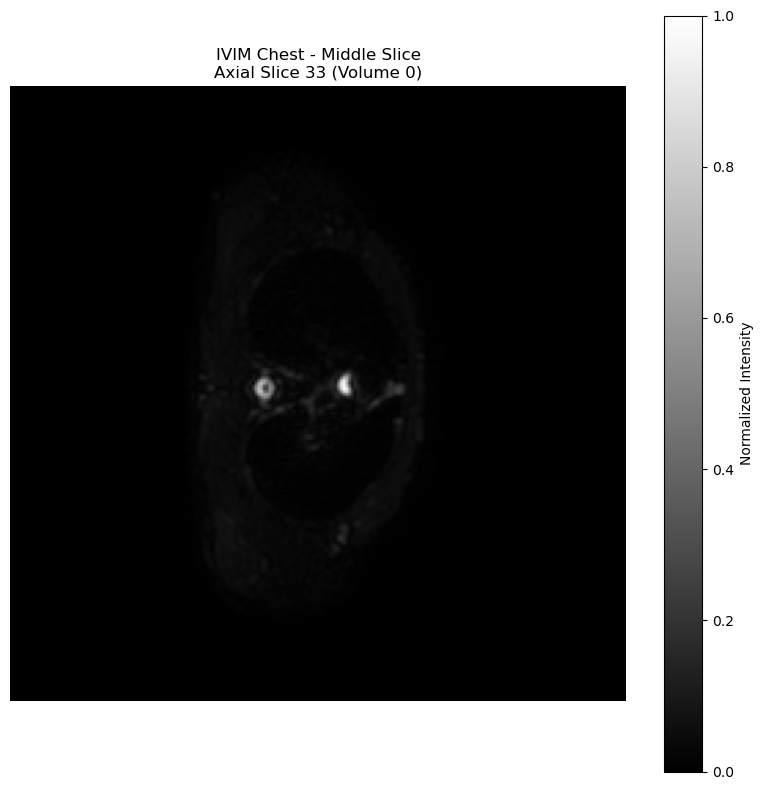


👁️ IVIM Chest - Middle Slice (Last Volume 8):


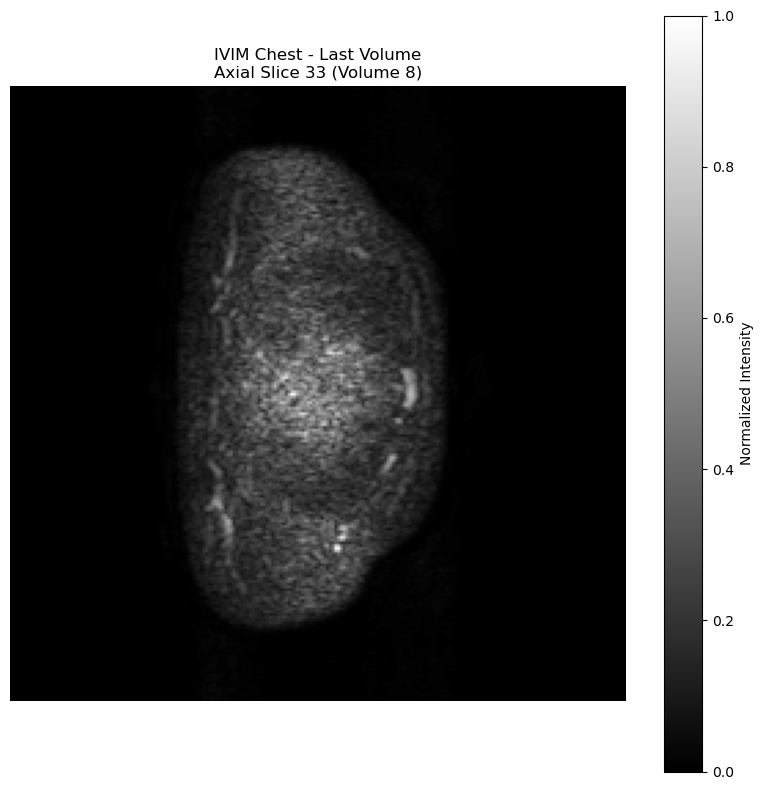


👁️ Tumor - Middle Slice:

👁️ Tumor - Middle Slice (Improved Visualization):


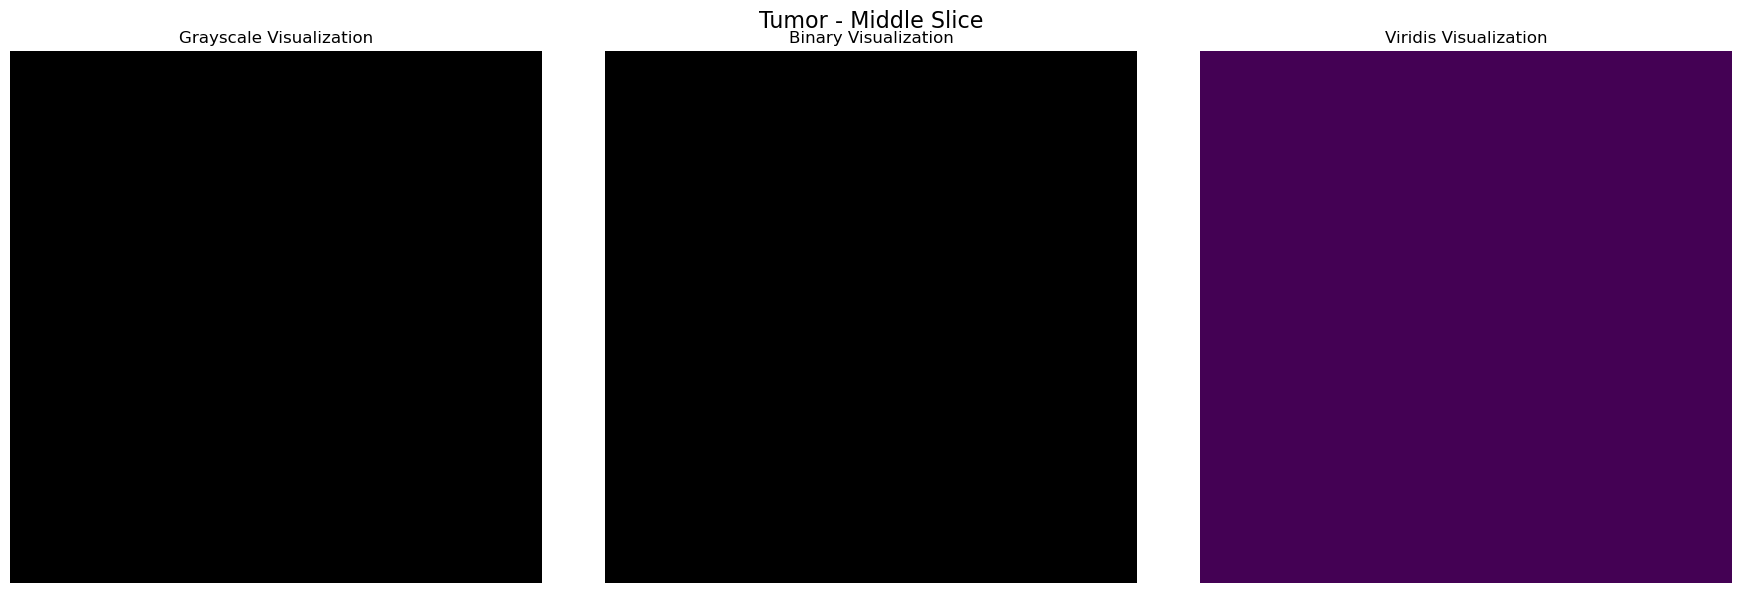

Slice info: min=0.000000, max=0.000000
Non-zero pixels: 0/36864 (0.00%)


In [ ]:
def display_slice(data, slice_index=None, axis=2, volume_index=0, title=None):
    """
    Display a slice from a 3D or 4D NIfTI data array
    
    Parameters:
        data (numpy.ndarray): The NIfTI data array
        slice_index (int): Index of the slice to display (default: middle slice)
        axis (int): Axis along which to take the slice (0=sagittal, 1=coronal, 2=axial)
        volume_index (int): For 4D data, which volume to use (default: 0)
        title (str): Optional title for the plot
    """
    # Handle 4D data
    if len(data.shape) > 3:
        if volume_index >= data.shape[3]:
            print(f"Error: Volume index {volume_index} out of range (max: {data.shape[3]-1})")
            return
        data_3d = data[..., volume_index]
        volume_info = f" (Volume {volume_index})"
    else:
        data_3d = data
        volume_info = ""
    
    # Select the middle slice if not specified
    if slice_index is None:
        slice_index = data_3d.shape[axis] // 2
    
    # Get the orientation name and extract the slice
    orientations = ['Sagittal', 'Coronal', 'Axial']
    orientation = orientations[axis]
    
    if axis == 0:
        slice_data = data_3d[slice_index, :, :]
    elif axis == 1:
        slice_data = data_3d[:, slice_index, :]
    else:  # axis == 2 (default)
        slice_data = data_3d[:, :, slice_index]
    
    # Normalize for better visualization
    if slice_data.max() > slice_data.min():
        norm_data = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())
    else:
        norm_data = slice_data
    
    # Create figure
    plt.figure(figsize=(8, 8))
    
    # Display the slice
    plt.imshow(norm_data, cmap='gray')
    
    # Set title
    if title:
        plt.title(f"{title}\n{orientation} Slice {slice_index}{volume_info}")
    else:
        plt.title(f"{orientation} Slice {slice_index}{volume_info}")
    
    # Add colorbar and remove axis ticks
    plt.colorbar(label='Normalized Intensity')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display middle slices and last 4D slice
print("\n" + "=" * 70)
print("MIDDLE SLICES".center(70))
print("=" * 70)

# IVIM Middle Slice (from first volume)
print("\n👁️ IVIM Chest - Middle Slice (First Volume):")
display_slice(ivim_data, axis=2, volume_index=0, title="IVIM Chest - Middle Slice")

# IVIM Last Volume (last 4th dimension)
if len(ivim_data.shape) > 3:
    last_vol_index = ivim_data.shape[3] - 1
    print(f"\n👁️ IVIM Chest - Middle Slice (Last Volume {last_vol_index}):")
    display_slice(ivim_data, axis=2, volume_index=last_vol_index, title=f"IVIM Chest - Last Volume")

# Tumor Middle Slice
print("\n👁️ Tumor - Middle Slice:")
# For tumor data, we use 'hot' colormap to better visualize it
def display_tumor_slice(data, slice_index=None, axis=2, title=None):
    """Special function to display tumor data with better visibility"""
    # Find the middle slice if not specified
    if slice_index is None:
        slice_index = data.shape[axis] // 2
        
    # Get the slice
    if axis == 0:
        slice_data = data[slice_index, :, :]
    elif axis == 1:
        slice_data = data[:, slice_index, :]
    else:  # axis == 2
        slice_data = data[:, :, slice_index]
    
    # Display the slice
    plt.figure(figsize=(8, 8))
    plt.imshow(slice_data, cmap='hot')
    plt.colorbar(label='Value')
    plt.title(f"Tumor - Axial Slice {slice_index}" if not title else title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Print slice info
    print(f"Slice info: min={slice_data.min():.6f}, max={slice_data.max():.6f}")
    print(f"Non-zero pixels: {np.count_nonzero(slice_data)}/{slice_data.size} " +
          f"({np.count_nonzero(slice_data)/slice_data.size*100:.2f}%)")

# Display tumor middle slice
display_tumor_slice(tumor_data, axis=2, title="Tumor - Middle Slice")


                     HIGHEST, 3RD, AND MID SLICES                     

👁️ IVIM Chest - Slice with Highest Value (#26):


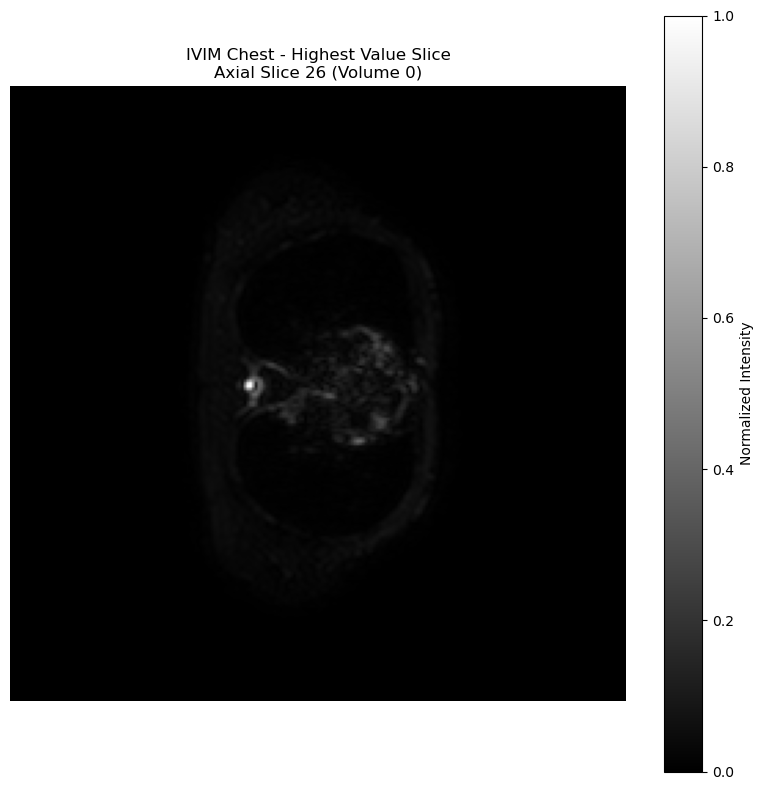


👁️ IVIM Chest - 3rd Slice:


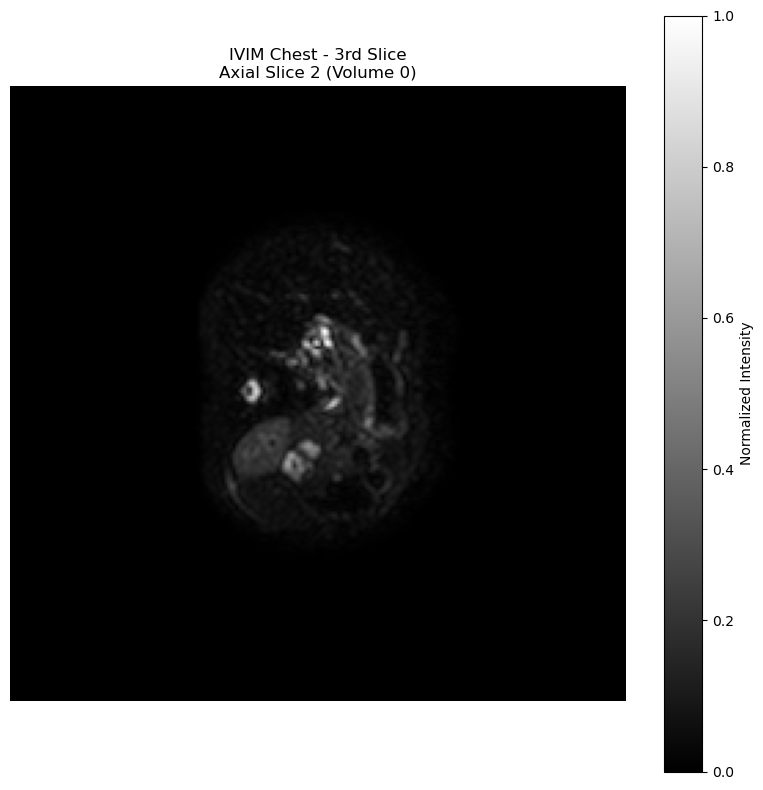


👁️ Tumor - Slice with Highest Value (#10):


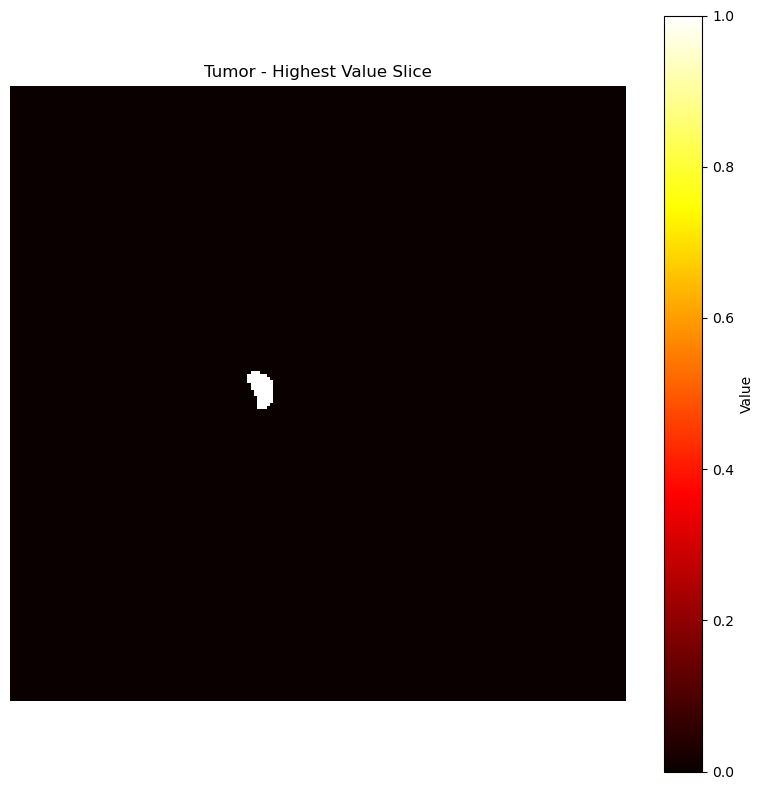

Slice info: min=0.000000, max=1.000000
Non-zero pixels: 67/36864 (0.18%)

👁️ Tumor - 3rd Slice:


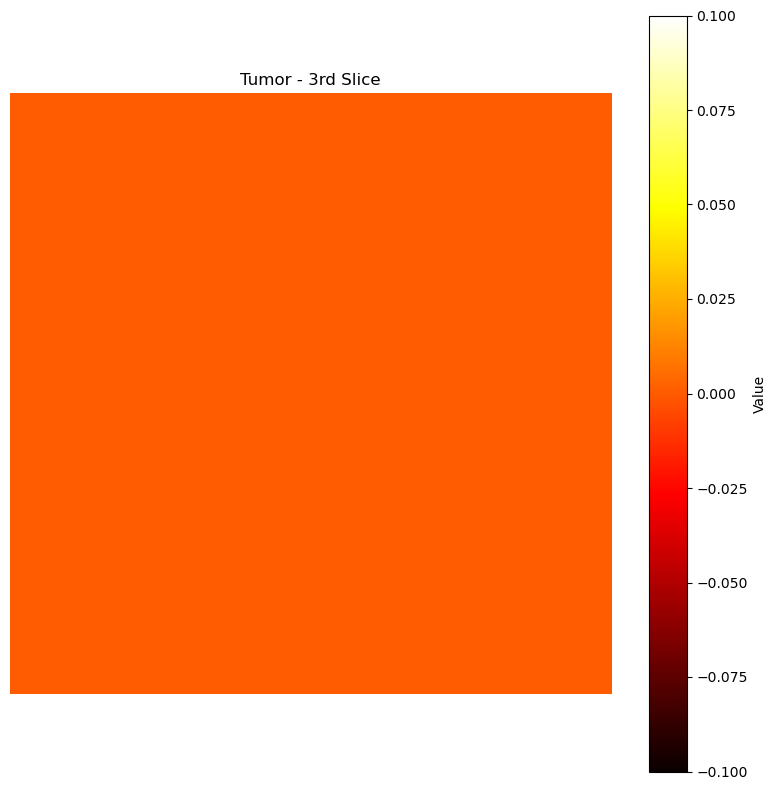

Slice info: min=0.000000, max=0.000000
Non-zero pixels: 0/36864 (0.00%)


In [4]:
print("\n" + "=" * 70)
print("HIGHEST, 3RD, AND MID SLICES".center(70))
print("=" * 70)

def find_highest_value_slice(data, axis=2):
    """Find the slice with the highest maximum value"""
    max_values = []
    
    for i in range(data.shape[axis]):
        if axis == 0:
            slice_data = data[i, :, :]
        elif axis == 1:
            slice_data = data[:, i, :]
        else:  # axis == 2
            slice_data = data[:, :, i]
            
        max_values.append(slice_data.max())
    
    highest_slice = np.argmax(max_values)
    return highest_slice

# Find and display highest value slice for IVIM
highest_ivim_slice = find_highest_value_slice(ivim_data[..., 0])  # Using first volume
print(f"\n👁️ IVIM Chest - Slice with Highest Value (#{highest_ivim_slice}):")
display_slice(ivim_data, slice_index=highest_ivim_slice, axis=2, volume_index=0,
             title=f"IVIM Chest - Highest Value Slice")

# Display 3rd slice for IVIM
print("\n👁️ IVIM Chest - 3rd Slice:")
display_slice(ivim_data, slice_index=2, axis=2, volume_index=0,
             title="IVIM Chest - 3rd Slice")

# Display middle slice for IVIM (already done above)

# For tumor data
highest_tumor_slice = find_highest_value_slice(tumor_data)
print(f"\n👁️ Tumor - Slice with Highest Value (#{highest_tumor_slice}):")
display_tumor_slice(tumor_data, slice_index=highest_tumor_slice, title="Tumor - Highest Value Slice")

# Display 3rd slice for tumor
print("\n👁️ Tumor - 3rd Slice:")
display_tumor_slice(tumor_data, slice_index=2, title="Tumor - 3rd Slice")

# Display middle slice for tumor (already done above)

In [5]:
print("\n" + "=" * 70)
print("SUMMARY".center(70))
print("=" * 70)

# Summary of IVIM data
print("\n📋 IVIM Chest Dataset:")
print(f"• Shape: {ivim_data.shape}")
if len(ivim_data.shape) > 3:
    print(f"• Number of volumes: {ivim_data.shape[3]}")
print(f"• Total number of voxels: {np.prod(ivim_data.shape)}")
print(f"• Value range: [{ivim_data.min():.3f}, {ivim_data.max():.3f}]")

# Summary of tumor data
print("\n📋 Tumor Dataset:")
print(f"• Shape: {tumor_data.shape}")
print(f"• Total number of voxels: {np.prod(tumor_data.shape)}")
print(f"• Value range: [{tumor_data.min():.3f}, {tumor_data.max():.3f}]")
print(f"• Non-zero voxels: {np.count_nonzero(tumor_data)} ({np.count_nonzero(tumor_data)/tumor_data.size*100:.2f}%)")


                               SUMMARY                                

📋 IVIM Chest Dataset:
• Shape: (224, 224, 67, 9)
• Number of volumes: 9
• Total number of voxels: 30256128
• Value range: [0.000, 3827.761]

📋 Tumor Dataset:
• Shape: (192, 192, 64)
• Total number of voxels: 2359296
• Value range: [0.000, 1.000]
• Non-zero voxels: 2170 (0.09%)
